# Лабораторная работа №1

## Тема: Разведочный анализ данных. Исследование и визуализация данных.

## Выполнил: Фонин Максим Алексеевич ИУ5-61Б

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as mth
import matplotlib.patches as patches
from scipy import stats as st
plt.rcParams.update({'figure.max_open_warning': 0})

from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

In [11]:
df = pd.read_csv('xAPI-Edu-Data.csv')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [13]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
raisedhands,480.0,46.775000,30.779223,0.0,15.75,50.0,75.0,100.0
VisITedResources,480.0,54.797917,33.080007,0.0,20.00,65.0,84.0,99.0
AnnouncementsView,480.0,37.918750,26.611244,0.0,14.00,33.0,58.0,98.0
Discussion,480.0,43.283333,27.637735,1.0,20.00,39.0,70.0,99.0


In [15]:
df.isna().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [16]:
df.columns


Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [17]:
df.columns = df.columns.str.lower()
df.columns

Index(['gender', 'nationality', 'placeofbirth', 'stageid', 'gradeid',
       'sectionid', 'topic', 'semester', 'relation', 'raisedhands',
       'visitedresources', 'announcementsview', 'discussion',
       'parentansweringsurvey', 'parentschoolsatisfaction',
       'studentabsencedays', 'class'],
      dtype='object')

In [18]:
df.duplicated().sum()

2

In [19]:
df = df.drop_duplicates()

In [20]:
df.duplicated().sum()

0

Text(0, 0.5, 'Средние баллы')

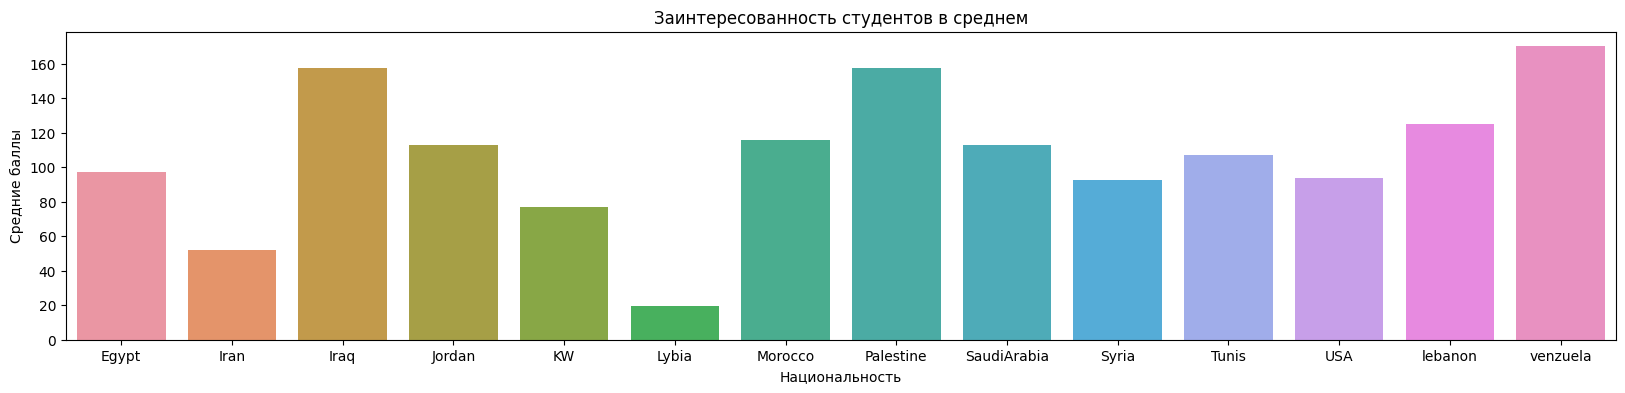

In [38]:
mean_t = df.pivot_table(index = 'nationality', 
                             values = 'student_interest', 
                             aggfunc = 'mean').sort_values(by = 'student_interest')
plt.figure(figsize=(20,4))
sns.barplot(x = mean_t.index, y = mean_t['student_interest'])
plt.title('Заинтересованность студентов в среднем')
plt.xlabel('Национальность')
plt.ylabel('Средние баллы')

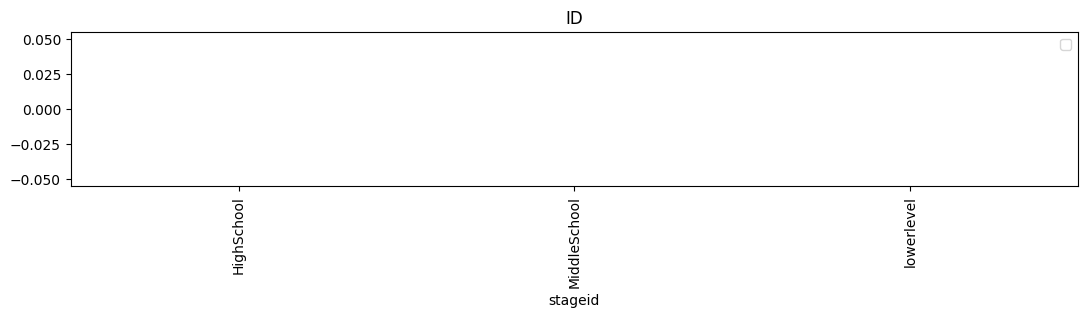

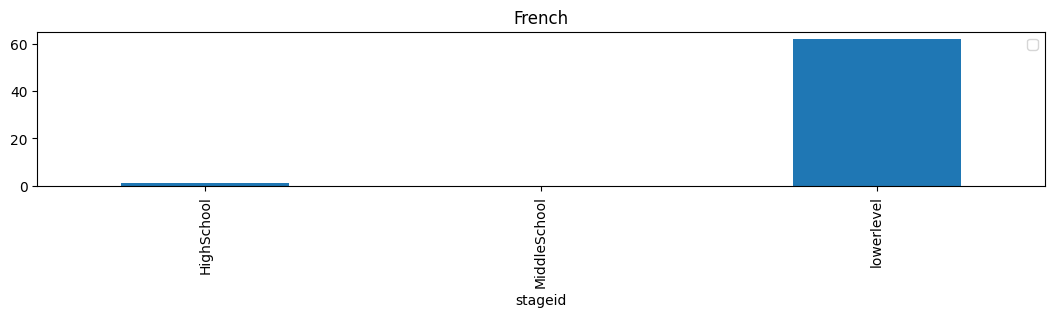

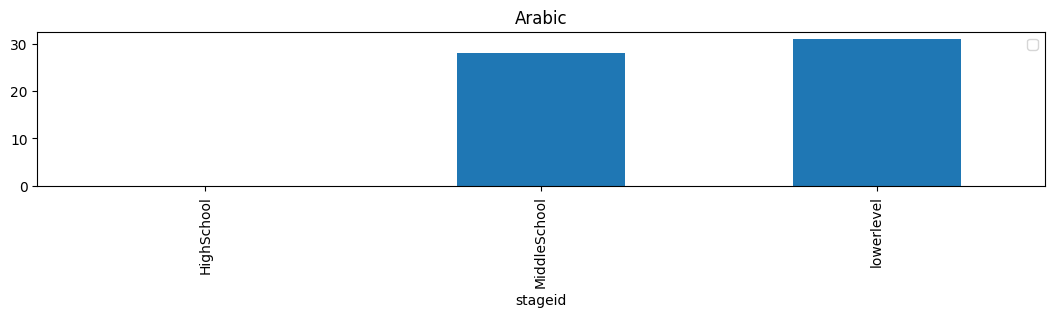

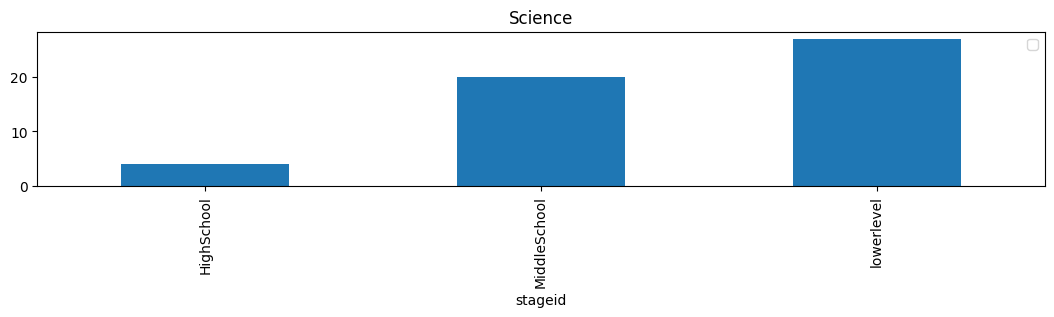

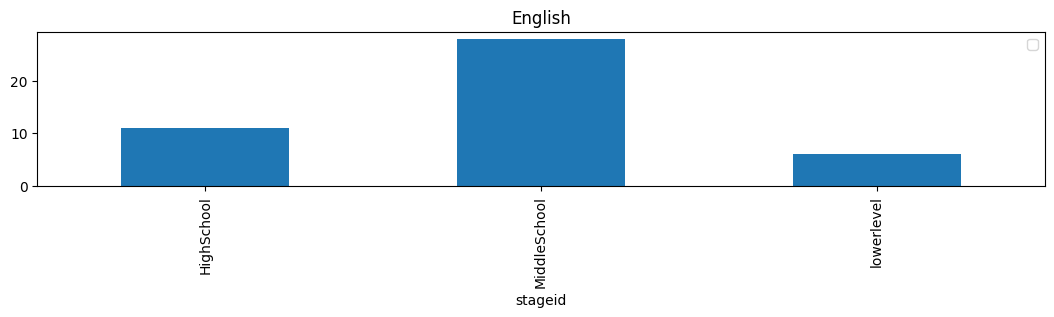

In [47]:
for topic in topic_list:
    df[df['topic'] == topic].pivot_table(index='stageid',
                                             values='gender',
                                             aggfunc='count').plot(kind='bar', figsize=(13,2))
    plt.title(topic)
    plt.legend('')

<AxesSubplot: >

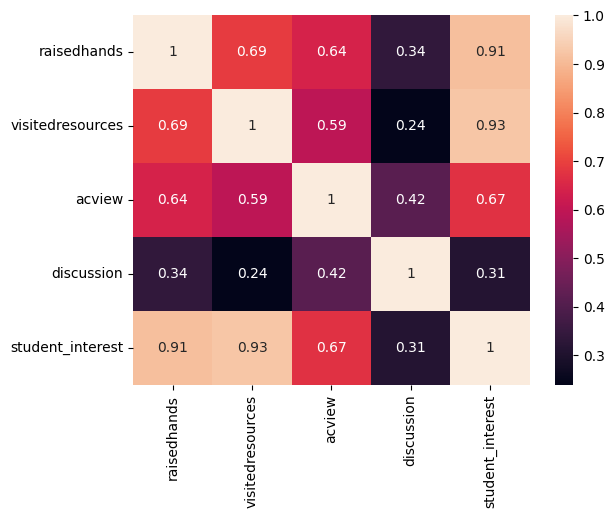

In [48]:
sns.heatmap(df.corr(), annot = True)